<a href="https://colab.research.google.com/github/italolima04/-quarentena-dados/blob/master/Aula02/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Dados

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Lendo dados no formato CSV e passando para um Data Frame.
grades = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')


In [0]:
movies = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')


# Visualizando os Dados

In [0]:
#Visualizar as 5 primeiras linhas do Data Frame.
grades.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Filtrando os Dados

In [0]:
#Utilizando método query para filtrar pelo 'movieId' a coluna notas de um filme em específico
grades_movie_1 = grades.query('movieId == 1')['rating']

In [0]:
grades_movie_2 = grades.query('movieId == 2')['rating']

In [0]:
grades_movie_32 = grades.query('movieId == 32')['rating']

# Plotando os Gráficos Correspondentes

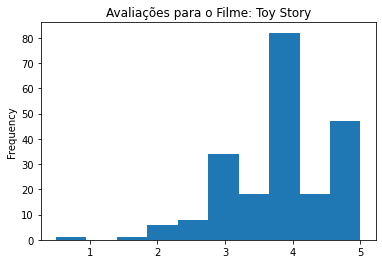

In [0]:
#Plotar o Gráfico, com parâmetro específico, nesse caso um histograma.
grades_movie_1.plot(kind='hist')
#Atribuir título para o Gráfico utilizando Matplotlib
plt.title("Avaliações para o Filme: Toy Story")
#Exibir o Gráfico
plt.show()

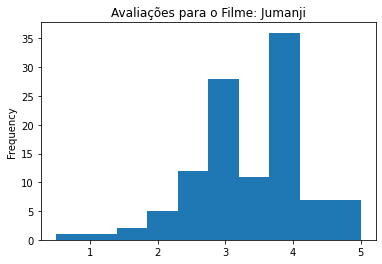

In [0]:
grades_movie_2.plot(kind='hist')
plt.title("Avaliações para o Filme: Jumanji")
plt.show()

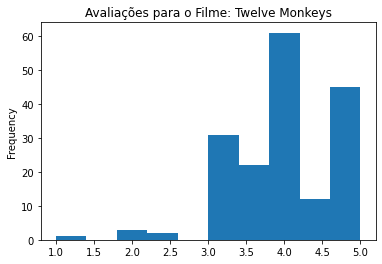

In [0]:
grades_movie_32.plot(kind='hist')
plt.title("Avaliações para o Filme: Twelve Monkeys")
plt.show()

# Descrevendo os Dados

In [0]:
#Método do Pandas p/ descrever estatisticamente um Data Frame. 
#Dados: Quantidade de valores, média, desvio padrão, entrada miníma, 1º quartil, 2º quartil (mediana), 3º quartil e entrada máxima
grades_movie_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [0]:
grades_movie_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [0]:
grades_movie_32.describe()

count    177.000000
mean       3.983051
std        0.790387
min        1.000000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

# Manipulando os Dados

In [0]:
#Método groupby do Pandas, para agrupar os dados pelo 'movieId' e utilizar o método para calcular a média nas colunas.
grades.groupby('movieId').mean()


,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Observe que a média não é uma medida interessante para todas as colunas acima, assim alguns dados podem não fazer sentido.

# Generalizando o Processo

Vimos que o processo acima foi repetido para diferentes filmes.

A partir do Id de cada filme, os dados foram filtrados, manipulados, plotados em forma de gráfico e descritos estatísticamente.

**Com isso, é interessante criar uma função que automatize e generalize o processo.**

In [0]:
#Função que recebe como parâmetro um número, simbolizando o Id do filme em que se deseja trabalhar.
def plot_movie(n):
  #Filtra os dados pelo id, buscando as notas na respectica coluna.
  grades_movie = grades.query(f'movieId == {n}')['rating']
  #Aplica configurações para que sejam plotados dois tipos de gráficos, histograma e o box plot. 
  grades_movie.plot(kind='hist')
  plt.show()
  grades_movie.plot.box()
  plt.show()
  #Retorna as medidas estatísticas que descrevem os dados.
  return grades_movie.describe()

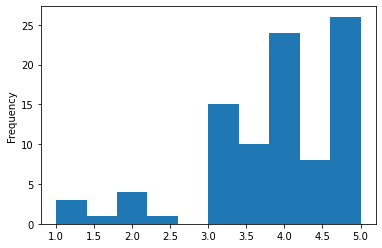

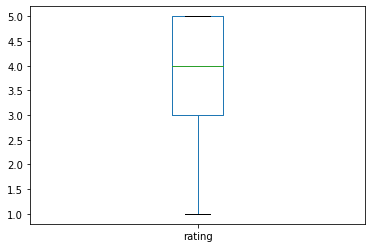

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

In [0]:
#Chamada da função, com o filme de Id 919
plot_movie(919)

# Aplicando Biblioteca Seaborn

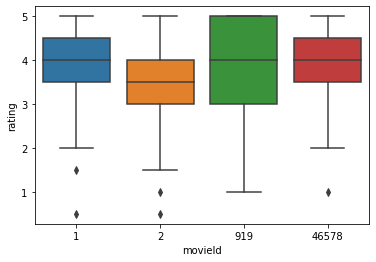

In [0]:
#Método da biblioteca Seaborn para plotar o gráfico de caixa e bigodes (box-plot)
sns.boxplot(data= grades.query('movieId in [1, 2, 919, 46578]'), x='movieId', y='rating')

# Desafios

**Desafio 1:**

Colocar Valores em cima de cada Barra, do gráfico.

**Desafio 2:**

Rotacionar os Ticks em 45º Graus.

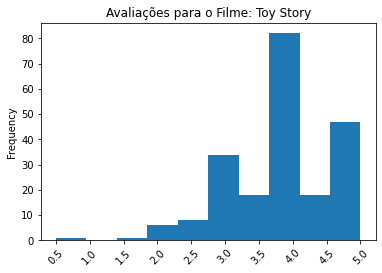

In [0]:
grades_movie_1.plot(kind='hist')
plt.title("Avaliações para o Filme: Toy Story")
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], rotation=45)
plt.show()

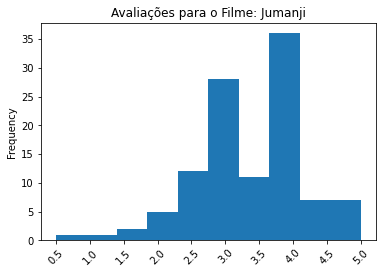

In [0]:
grades_movie_2.plot(kind='hist')
plt.title("Avaliações para o Filme: Jumanji")
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], rotation=45)
plt.show()

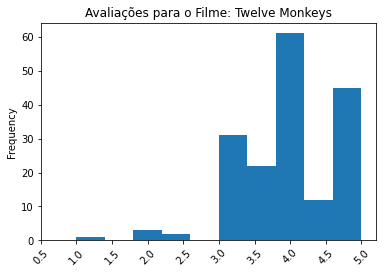

In [0]:
grades_movie_32.plot(kind='hist')
plt.title("Avaliações para o Filme: Twelve Monkeys")
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], rotation=45)
plt.show()

**Desafio 3:**

Comparar filmes com notas próximas e achar distribuições diferentes. 

**Desafio 4:**

Descobrir os 10 filmes mais votados e plotar os seus respectivos gráficos Box Plot

**Desafio 5:**

Indexar o tamanho do Box Plot e botar o nome do filme no tick

**Desafio 6:**

Colocar Valores em cima de cada Barra, do gráfico.

**Desafio 7:**

Calcular média, moda e mediana de filmes com média entre 3.5 e 5

**Desafio 8:**

Plotar o Histograma e o Box Plot lado a lado

**Desafio Final:**

Plotar um gráfico com as Notas médias por Ano.